In [54]:
import numpy
import pandas
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
import warnings
import math
import matplotlib.pyplot as plt

In [28]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
quora_train = pandas.read_csv("data/train.csv")

In [30]:
print (type(quora_train))
print(quora_train.head())



<class 'pandas.core.frame.DataFrame'>
   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  


In [47]:
# Editing questions with NLTK package

def stem_stopwords_punctuation_case (phrase):
    """
    Receives a phrase and returns the same phrase stemmed, lowercase phrase without stopwords
    :param package_name: String. A phrase.
    :return: String. Stemmed, lowercase phrase without stopwords
    """

    stemmer = SnowballStemmer("english")
    stopwords = nltk.corpus.stopwords.words('english')
    translator = str.maketrans('', '', string.punctuation)
    
    if type(phrase) is float:
        if math.isnan(phrase):
            return ("")
    
    phrase = phrase.translate(translator) #removing punctuation
    phrase = phrase.lower() #removing word case
    
    stemmed = []
    words = phrase.split(" ")
    for word in words:
        if word not in stopwords:
            stemmed.append(stemmer.stem(word))
    
    stemmed = ' '.join(stemmed)
    return stemmed


stem_stopwords_punctuation_case(
    "What is the step by step guide to invest in share market in india?")



'step step guid invest share market india'

In [32]:
#quora_train = quora_train.head() #Only for test. Should be removed later

#This is causing warning to appear, should be fixed.
quora_train["question1_edited"] = quora_train["question1"].apply(lambda x: stem_stopwords_punctuation_case(x))

In [48]:
quora_train["question2_edited"] = quora_train["question2"].apply(lambda x: stem_stopwords_punctuation_case(x))

In [49]:
print (quora_train.head())

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  \
0  What is the step by step guide to invest in sh...             0   
1  What would happen if the Indian government sto...             0   
2  How can Internet speed be increased by hacking...             0   
3  Find the remainder when [math]23^{24}[/math] i...             0   
4            Which fish would survive in salt water?             0   

                                    question1_edited  \
0           step step guid invest share market india   
1                    stori kohinoo

In [52]:
def calculate_common_percentage(df):
    """
    Receives the initial data frame and adds  the colunms "num_words_common", "num_words_total" and "common_percentage"
    :param package_name: Data frame train.csv from the Kaggle website
    :return: Data frame with added colunms "num_words_common", "num_words_total" and "common_percentage"
    """

    num_words_common = []
    num_words_total = []

    for line in range(0,len(df)):
        count_total = 0
        count_common = 0
        for word in df["question1_edited"][line].split(" "):
            if word in df["question2_edited"][line]:
                count_common = count_common+1
            count_total = count_total+1
        num_words_common.append(count_common) 
        num_words_total.append(count_total)

    num_words_common = pandas.Series(num_words_common)
    num_words_total = pandas.Series(num_words_total)

    df["num_words_common"] = num_words_common.values
    df["num_words_total"] = num_words_total.values
    df["common_percentage"] = df["num_words_common"]/df["num_words_total"]

    return (df)

quora_train = calculate_common_percentage(quora_train)

print (quora_train.head())

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  \
0  What is the step by step guide to invest in sh...             0   
1  What would happen if the Indian government sto...             0   
2  How can Internet speed be increased by hacking...             0   
3  Find the remainder when [math]23^{24}[/math] i...             0   
4            Which fish would survive in salt water?             0   

                                    question1_edited  \
0           step step guid invest share market india   
1                    stori kohinoo

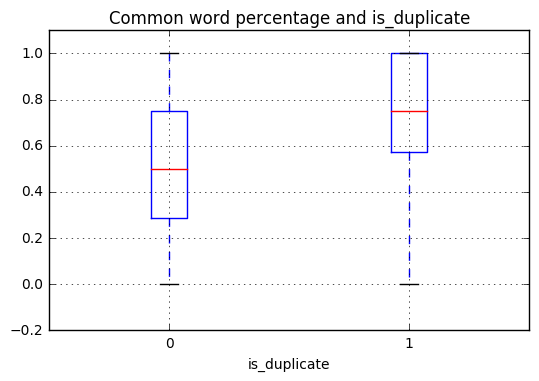

In [70]:
#"num_words_common", "num_words_total" and "common_percentage"

plt.figure()
#plt.boxplot(quora_train["common_percentage"],quora_train["is_duplicate"])


quora_train.boxplot(column='common_percentage', by='is_duplicate')
plt.suptitle('')

axes = plt.gca()
axes.set_ylim([-0.2,1.1])
plt.title("Common word percentage and is_duplicate")

plt.show()